### Weather Accidents (Neural Networks) 

In [2]:
import tensorflow as tf

from tensorflow import keras

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import Dropout

import pandas as pd

import numpy as np



In [3]:
#load csv 

MQdata = pd.read_csv("/Users/ocran_k1/Desktop/Weather-Accidents/MQdata.csv")


print(MQdata.head())


   Severity  Precipitation  Visibility  Temperature  Wind Chill  Wind Speed  \
0         3           0.02        10.0         36.9         NaN         NaN   
1         2           0.00        10.0         37.9         NaN         NaN   
2         2            NaN        10.0         36.0        33.3         3.5   
3         3            NaN         9.0         35.1        31.0         4.6   
4         2            NaN         6.0         36.0        33.3         3.5   

   Pressure  Humidity  Clear  Fair  ...  Heavy Snow  Light Snow  Heavy Rain  \
0     29.68      0.91      0     0  ...           0           0           0   
1     29.65      1.00      0     0  ...           0           0           0   
2     29.67      1.00      0     0  ...           0           0           0   
3     29.64      0.96      0     0  ...           0           0           0   
4     29.65      0.89      0     0  ...           0           0           0   

   Light Rain  Haze  Fog  T_Storm  Daytime  Nighti

In [4]:
variables  = ['Severity','Nightime']

MQdata.drop(variables,axis = 1, inplace = True) # drop Severity with 4 categories (rerun original  dataset)

# #Moving the 'Severity_1'(output variable) to the first position in the MQdataset
# col_name = "Severity_1"
# first_col = MQdata.pop(col_name) #rerun original dataset
# MQdata.insert(0,col_name,first_col)
# MQdata.head()

In [5]:
MQdata = MQdata.dropna() # cleaning the data 

print(MQdata.head())

    Precipitation  Visibility  Temperature  Wind Chill  Wind Speed  Pressure  \
5            0.03         7.0         37.9        35.5         3.5     29.63   
9            0.02         3.0         37.4        33.8         4.6     29.62   
11           0.02         3.0         37.4        33.8         4.6     29.62   
14           0.02         3.0         37.4        33.8         4.6     29.62   
20           0.01         2.0         33.8        29.6         4.6     29.62   

    Humidity  Clear  Fair  Cloudy  ...  Partly Cloudy  Heavy Snow  Light Snow  \
5       0.97      0     0       0  ...              0           0           0   
9       1.00      0     0       0  ...              0           0           0   
11      1.00      0     0       0  ...              0           0           0   
14      1.00      0     0       0  ...              0           0           0   
20      1.00      0     0       0  ...              0           0           1   

    Heavy Rain  Light Rain  Haze

In [6]:

msk = np.random.rand(len(MQdata)) <= 0.7

train_df = MQdata[msk]

np.random.shuffle(train_df.values)

test_df = MQdata[~ msk]

print(test_df.head())

test_df.Severity_1.values[0:6]

print(type(test_df.Precipitation.values[0:6]))

print(test_df.shape)

test_df.dtypes

    Precipitation  Visibility  Temperature  Wind Chill  Wind Speed  Pressure  \
5            0.03         7.0         37.9        35.5         3.5     29.63   
20           0.01         2.0         33.8        29.6         4.6     29.62   
25           0.01         5.0         37.9        34.4         4.6     29.60   
40           0.01         0.8         21.0        10.6         9.2     29.67   
44           0.00         2.0         23.0        10.1        15.0     29.66   

    Humidity  Clear  Fair  Cloudy  ...  Partly Cloudy  Heavy Snow  Light Snow  \
5       0.97      0     0       0  ...              0           0           0   
20      1.00      0     0       0  ...              0           0           1   
25      1.00      0     0       0  ...              0           0           1   
40      0.85      0     0       0  ...              0           0           1   
44      0.88      0     0       0  ...              0           0           1   

    Heavy Rain  Light Rain  Haze

Precipitation    float64
Visibility       float64
Temperature      float64
Wind Chill       float64
Wind Speed       float64
Pressure         float64
Humidity         float64
Clear              int64
Fair               int64
Cloudy             int64
Drizzle            int64
Snow               int64
Partly Cloudy      int64
Heavy Snow         int64
Light Snow         int64
Heavy Rain         int64
Light Rain         int64
Haze               int64
Fog                int64
T_Storm            int64
Daytime            int64
Severity_1         int64
dtype: object

In [37]:
model = keras.Sequential([
    keras.layers.Dense(9,input_shape = (19,), activation = 'relu'),#7 input
    keras.layers.Dense(2, activation = 'sigmoid')]) #for binary classification

model.compile(optimer = 'adam',
             loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics = ['accuracy'])

#fit training data

# create variable for train predictors
train_preds = (train_df.Precipitation.values, 
               train_df.Visibility.values, 
               train_df.Temperature.values, 
               train_df['Wind Chill'].values, 
               train_df['Wind Speed'].values,
               train_df.Pressure.values, 
               train_df.Humidity.values,
               train_df.Clear.values,
               train_df.Fair.values,
               train_df.Cloudy.values,
               train_df.Drizzle.values,
               train_df.Snow.values,
               train_df['Partly Cloudy'].values,
               train_df['Heavy Snow'].values,
               train_df['Light Snow'].values,
               train_df['Heavy Rain'].values,
               train_df.Haze.values,
               train_df.Fog.values,
               train_df.T_Storm.values)

x = np.column_stack(train_preds)

history = model.fit([x],train_df.Severity_1.values, batch_size = 12, epochs = 5) #epochs: How many times do we
                                                                            #go through our data 



Train on 74735 samples
Epoch 1/5
74735/74735 [==============================] - 5s 67us/sample - loss: 0.6717 - accuracy: 0.6068
Epoch 2/5
74735/74735 [==============================] - 5s 63us/sample - loss: 0.6663 - accuracy: 0.6069
Epoch 3/5
74735/74735 [==============================] - 5s 63us/sample - loss: 0.6651 - accuracy: 0.6068
Epoch 4/5
74735/74735 [==============================] - 5s 63us/sample - loss: 0.6641 - accuracy: 0.6070
Epoch 5/5
74735/74735 [==============================] - 5s 63us/sample - loss: 0.6634 - accuracy: 0.6068


In [31]:
#Evaluate on test data

# create predictors for test variables
test_preds = (test_df.Precipitation.values, 
              test_df.Visibility.values, 
              test_df.Temperature.values, 
              test_df['Wind Chill'].values, 
              test_df['Wind Speed'].values, 
              test_df.Pressure.values, 
              test_df.Humidity.values,
              test_df.Clear.values,
              test_df.Fair.values,
              test_df.Cloudy.values,
              test_df.Drizzle.values,
              test_df.Snow.values,
              test_df['Partly Cloudy'].values,
              test_df['Heavy Snow'].values,
              test_df['Light Snow'].values,
              test_df['Heavy Rain'].values,
              test_df.Haze.values,
              test_df.Fog.values,
              test_df.T_Storm.values)

test_x = np.column_stack(test_preds)


model.evaluate(test_x, test_df.Severity_1.values)



32090/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.6700069757925458, 0.60716736]

In [15]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

y_pred = model.predict_classes(test_x)

cm = confusion_matrix(y_true = test_df.Severity_1.values, y_pred = y_pred )

cm

array([[19463,    23],
       [12584,    20]])

In [16]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[19463    23]
 [12584    20]]


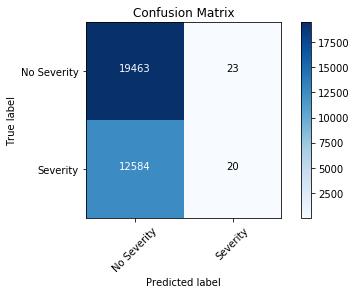

In [21]:
cm_plot_labels = ['No Severity','Severity']

plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

plt.savefig("/Users/ocran_k1/Desktop/Weather-Accidents/Confustion_Matrix.png", dpi = 300, format = 'png')

plt.show()